# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay, mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions

# Loading the data

In [2]:
diabetes = pd.read_csv("diabetes.csv")
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

# Data Normalization

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Data Splitting

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Logistic Regression Model

Coefficients: 
 [[ 0.30323034  1.06550345 -0.25812789  0.06825978 -0.15518268  0.68182846
   0.29197224  0.23468832]]
Intercept: 
 [-0.80678496]
Mean squared error: 0.18
Coefficient of determination: 0.17


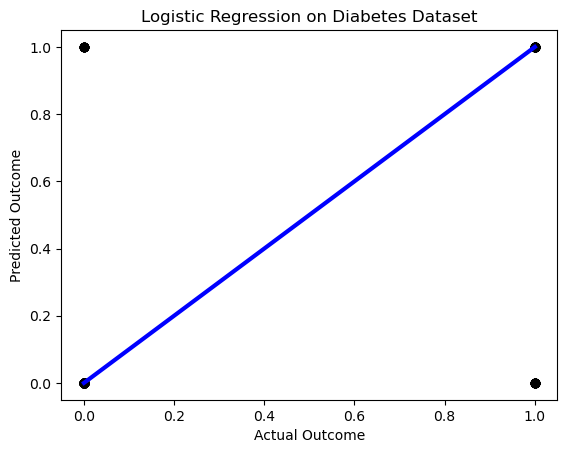

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Coefficients: \n", log_reg.coef_)
print("Intercept: \n", log_reg.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, color="black")
plt.plot([0, 1], [0, 1], color="blue", linewidth=3)
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.title("Logistic Regression on Diabetes Dataset")
plt.show()

# Confusion Matrix

Confusion matrix: 
 [[98  9]
 [18 29]]


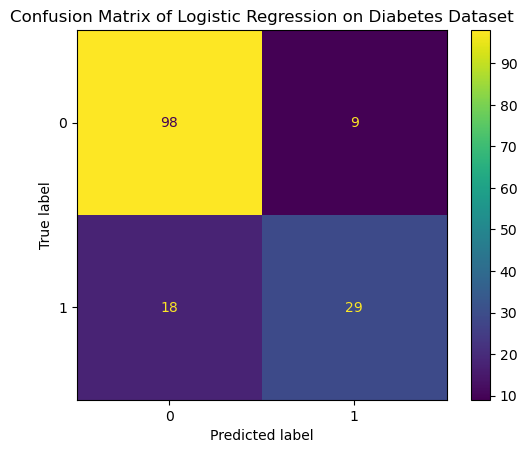

In [6]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix of Logistic Regression on Diabetes Dataset")
plt.show()

# ROC Curve of Logistic Regression

ROC AUC: 0.77


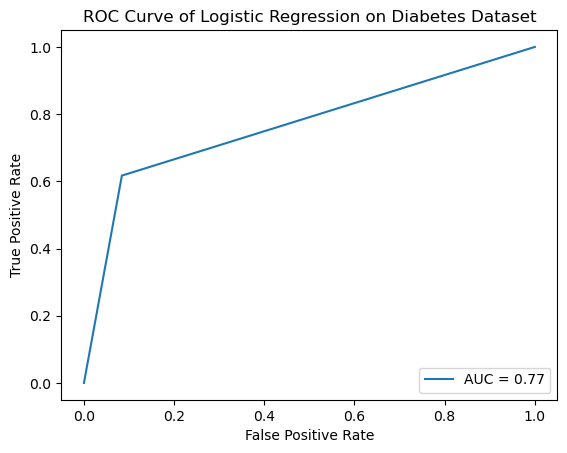

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC: %.2f" % roc_auc)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title("ROC Curve of Logistic Regression on Diabetes Dataset")
plt.show()

# Decision Region of Logistic Regression

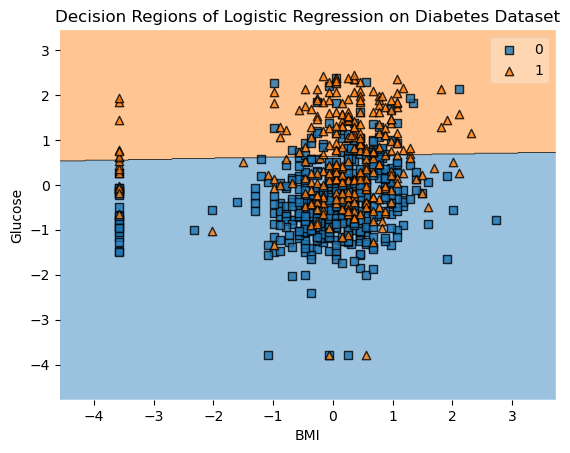

In [8]:
X_vis = X[:, [2, 1]] # BMI and Glucose features
log_reg.fit(X_vis, y)
plot_decision_regions(X=X_vis, y=y.values, clf=log_reg)
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title("Decision Regions of Logistic Regression on Diabetes Dataset")
plt.show()

In [9]:
# Adding some tables and figures based on Glucose and BMI
# Table of descriptive statistics for Glucose and BMI by outcome
diabetes.groupby("Outcome")[["Glucose", "BMI"]].describe()

Glucose                                                          \
          count        mean        std  min    25%    50%    75%    max   
Outcome                                                                   
0         500.0  109.980000  26.141200  0.0   93.0  107.0  125.0  197.0   
1         268.0  141.257463  31.939622  0.0  119.0  140.0  167.0  199.0   

           BMI                                                       
         count       mean       std  min   25%    50%     75%   max  
Outcome                                                              
0        500.0  30.304200  7.689855  0.0  25.4  30.05  35.300  57.3  
1        268.0  35.142537  7.262967  0.0  30.8  34.25  38.775  67.1

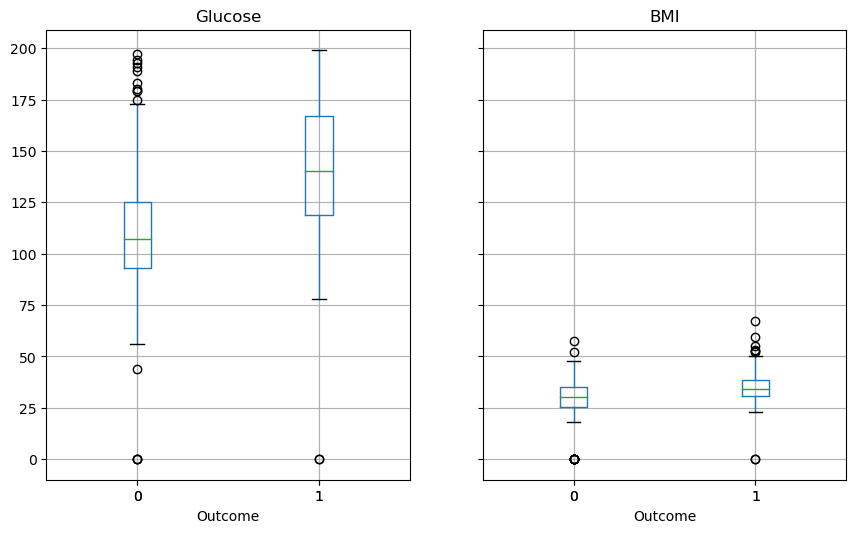

In [10]:
# Figure of boxplots for Glucose and BMI by outcome
diabetes.boxplot(column=["Glucose", "BMI"], by="Outcome", figsize=(10, 6))
plt.suptitle("")
plt.show()

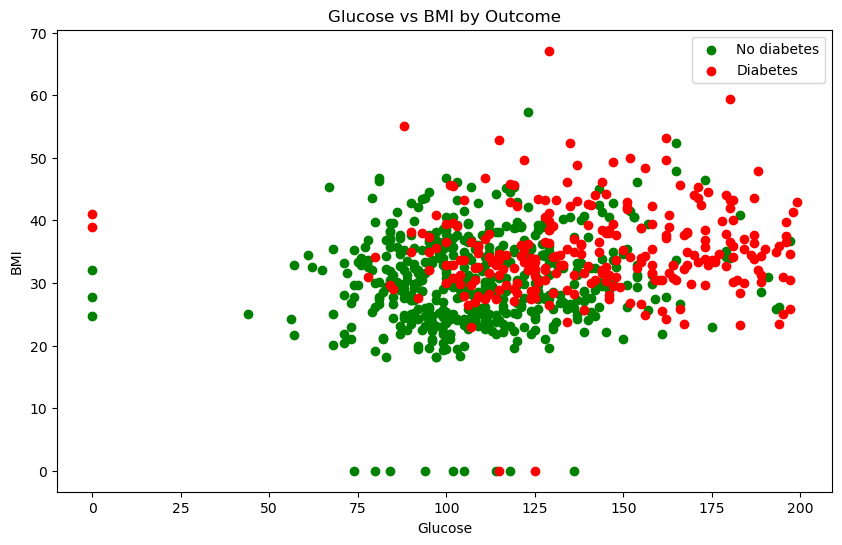

In [11]:
# Figure of scatter plot for Glucose vs BMI by outcome
plt.figure(figsize=(10, 6))
plt.scatter(diabetes[diabetes["Outcome"] == 0]["Glucose"], diabetes[diabetes["Outcome"] == 0]["BMI"], label="No diabetes", color="green")
plt.scatter(diabetes[diabetes["Outcome"] == 1]["Glucose"], diabetes[diabetes["Outcome"] == 1]["BMI"], label="Diabetes", color="red")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend()
plt.title("Glucose vs BMI by Outcome")
plt.show()